In [1]:
#!/usr/bin/env python
# coding: utf-8
# Author: Nelson Fernandez, Renault Research
# nelson.fernandez-pinto@renault.com

import sys,os
sys.path.append(os.getcwd())

# Imports
from dataset import *
from architectures import *
#from functions import *
from losses import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.autograd import Variable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)


# Generate dataset
me = MazeExplorer(maze_size=(64,64), nbr_instances=30, 
                  difficulty='easy', nbr_trajectories=2,
                  alpha=17)

# Show deopping percentages
me.get_dopping_percentage()  # point level
me.get_dopping_percentage_trajectories() # trajectory level

# Create CNN model
net = ConvNet().to(device)
print('CNN created...')


# Get set of train/test INDEXES (hacking SKlean train_test_split)
x = np.arange(0, me.len())
train_indexes, test_indexes, _, _ = train_test_split(x, x, 
                                                    test_size=0.33, 
                                                    random_state=7)


# Wrap transforming function to dataset object
t_me = TransformedDataset(me, xy_transform=xy_transform)

# Get training/test subsets
train_me = Subset(t_me, indices=train_indexes)
test_me = Subset(t_me, indices=test_indexes)

# Configure dataloaders
batch_size = 1
num_workers = 4

trainloader = DataLoader(train_me, shuffle=True, 
                          batch_size=batch_size, 
                          num_workers=num_workers, 
                          pin_memory=True)


testloader = DataLoader(test_me, shuffle=True, 
                         batch_size=batch_size, 
                         num_workers=1,
                         pin_memory=True)

print('Train test data loaders created...')

# Init losses
rmse = RMSELoss()
graphic_loss = GraphicLoss()
road_loss = RoadLoss(k1=0.1)

# Set optimizer (Adam)
optimizer = Adam(net.parameters(), lr=1e-3)
epochs = 200
print('Losses and optimizer created...')




100%|██████████| 30/30 [00:00<00:00, 824.99it/s]

Creating MazeExplorer dataset of difficulty easy
Using Prims generator
Using shortest path solver



 30%|███       | 36/120 [00:00<00:00, 183.49it/s]

Dataset generated... 120 available instances


 32%|███▎      | 39/120 [00:00<00:00, 386.25it/s]

Estimated dopping percentage (points) =  0.0


100%|██████████| 120/120 [00:00<00:00, 347.33it/s]


Estimated dopping percentage (trajectories)=  0.0
CNN created...
Train test data loaders created...
Losses and optimizer created...


Init training loop...


/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Train Epoch: 1 [79/80 (99%)] EnvLoss: 0.103306  RMSELoss: 25.467068 TotalLoss: 25.570370


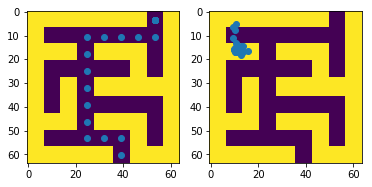

Train Epoch: 2 [79/80 (99%)] EnvLoss: 0.107269  RMSELoss: 23.954916 TotalLoss: 24.062183


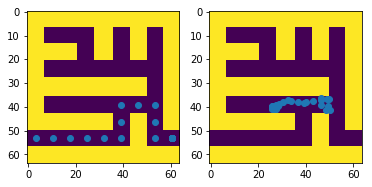

Train Epoch: 3 [79/80 (99%)] EnvLoss: 0.107156  RMSELoss: 21.270855 TotalLoss: 21.378012


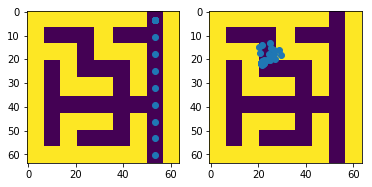

Train Epoch: 4 [79/80 (99%)] EnvLoss: 0.190916  RMSELoss: 19.482969 TotalLoss: 19.673887


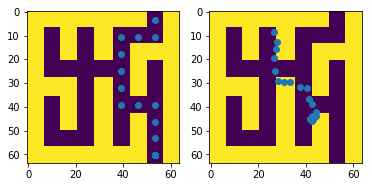

Train Epoch: 5 [79/80 (99%)] EnvLoss: 0.245777  RMSELoss: 16.691250 TotalLoss: 16.937029


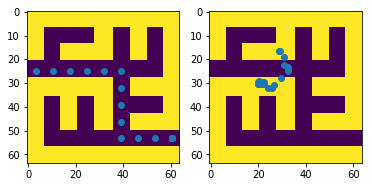

Train Epoch: 6 [79/80 (99%)] EnvLoss: 0.140039  RMSELoss: 15.820877 TotalLoss: 15.960917


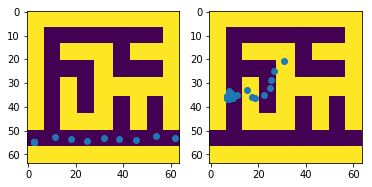

Train Epoch: 7 [79/80 (99%)] EnvLoss: 0.314260  RMSELoss: 14.565651 TotalLoss: 14.879909


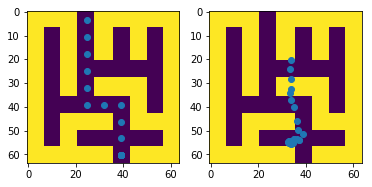

Train Epoch: 8 [79/80 (99%)] EnvLoss: 0.143726  RMSELoss: 12.377327 TotalLoss: 12.521053


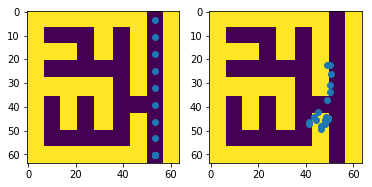

Train Epoch: 9 [79/80 (99%)] EnvLoss: 0.163279  RMSELoss: 12.342532 TotalLoss: 12.505812


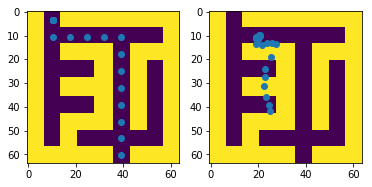

Train Epoch: 10 [79/80 (99%)] EnvLoss: 0.292038  RMSELoss: 12.398974 TotalLoss: 12.691012


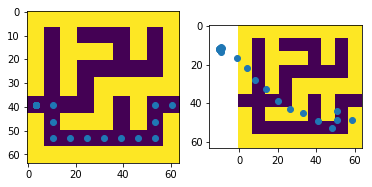

Train Epoch: 11 [79/80 (99%)] EnvLoss: 0.111959  RMSELoss: 10.631654 TotalLoss: 10.743612


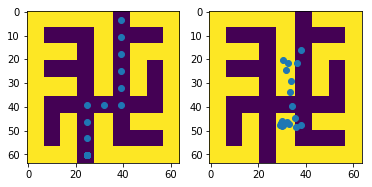

Train Epoch: 12 [79/80 (99%)] EnvLoss: 0.282222  RMSELoss: 11.324594 TotalLoss: 11.606818


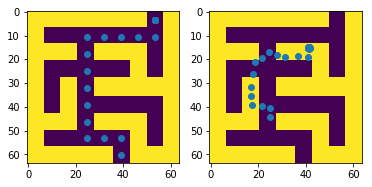

Train Epoch: 13 [79/80 (99%)] EnvLoss: 0.192663  RMSELoss: 9.883809 TotalLoss: 10.076472


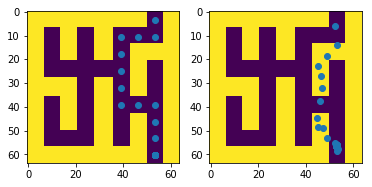

Train Epoch: 14 [79/80 (99%)] EnvLoss: 0.212120  RMSELoss: 9.938699 TotalLoss: 10.150819


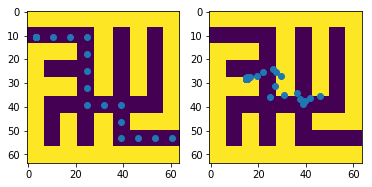

Train Epoch: 15 [79/80 (99%)] EnvLoss: 0.196818  RMSELoss: 9.350657 TotalLoss: 9.547473


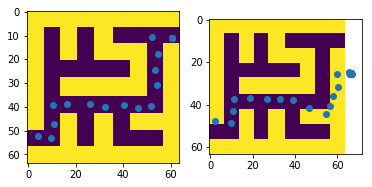

Train Epoch: 16 [79/80 (99%)] EnvLoss: 0.184652  RMSELoss: 8.204663 TotalLoss: 8.389318


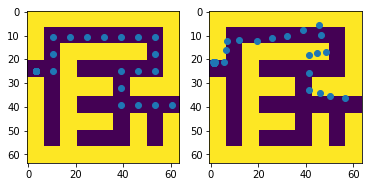

Train Epoch: 17 [79/80 (99%)] EnvLoss: 0.184666  RMSELoss: 8.636338 TotalLoss: 8.821004


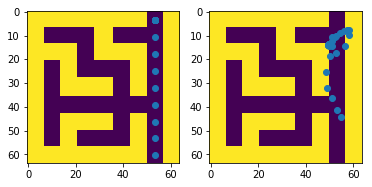

Train Epoch: 18 [79/80 (99%)] EnvLoss: 0.248534  RMSELoss: 7.467337 TotalLoss: 7.715871


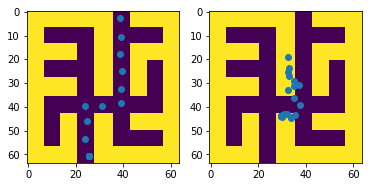

Train Epoch: 19 [79/80 (99%)] EnvLoss: 0.201314  RMSELoss: 6.994162 TotalLoss: 7.195477


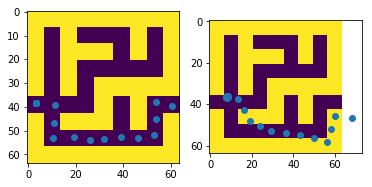

Train Epoch: 20 [79/80 (99%)] EnvLoss: 0.215048  RMSELoss: 7.463483 TotalLoss: 7.678531


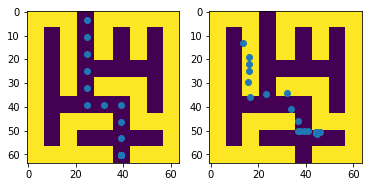

Train Epoch: 21 [79/80 (99%)] EnvLoss: 0.322344  RMSELoss: 7.501736 TotalLoss: 7.824080


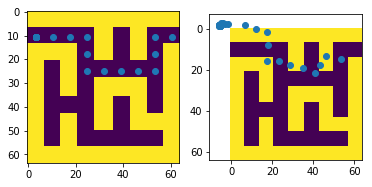

Train Epoch: 22 [79/80 (99%)] EnvLoss: 0.304748  RMSELoss: 7.353244 TotalLoss: 7.657991


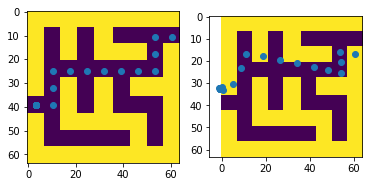

Train Epoch: 23 [79/80 (99%)] EnvLoss: 0.260737  RMSELoss: 7.245727 TotalLoss: 7.506463


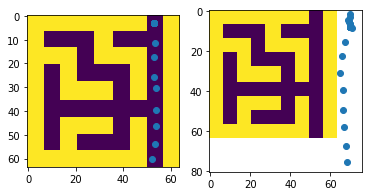

Train Epoch: 24 [79/80 (99%)] EnvLoss: 0.201423  RMSELoss: 7.131183 TotalLoss: 7.332604


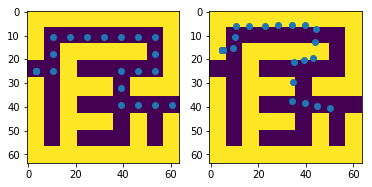

Train Epoch: 25 [79/80 (99%)] EnvLoss: 0.154462  RMSELoss: 6.781141 TotalLoss: 6.935604


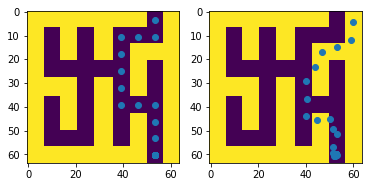

Train Epoch: 26 [79/80 (99%)] EnvLoss: 0.253883  RMSELoss: 7.292948 TotalLoss: 7.546832


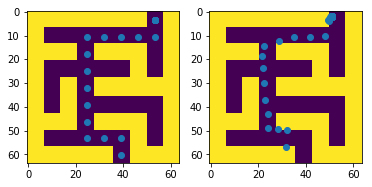

Train Epoch: 27 [79/80 (99%)] EnvLoss: 0.303758  RMSELoss: 6.695039 TotalLoss: 6.998797


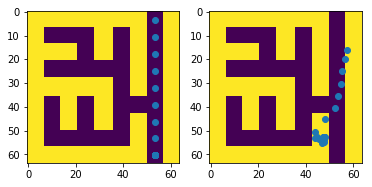

Train Epoch: 28 [79/80 (99%)] EnvLoss: 0.181374  RMSELoss: 7.141726 TotalLoss: 7.323101


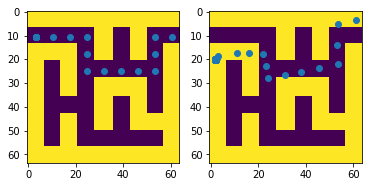

Train Epoch: 29 [79/80 (99%)] EnvLoss: 0.203996  RMSELoss: 5.903368 TotalLoss: 6.107362


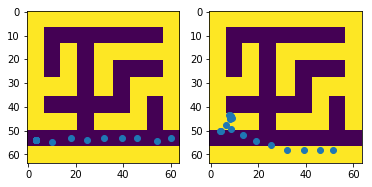

Train Epoch: 30 [79/80 (99%)] EnvLoss: 0.229435  RMSELoss: 6.232535 TotalLoss: 6.461970


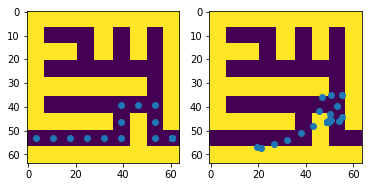

Train Epoch: 31 [79/80 (99%)] EnvLoss: 0.176269  RMSELoss: 6.958169 TotalLoss: 7.134436


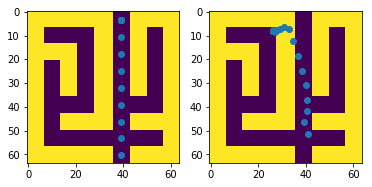

Train Epoch: 32 [79/80 (99%)] EnvLoss: 0.152559  RMSELoss: 6.094290 TotalLoss: 6.246850


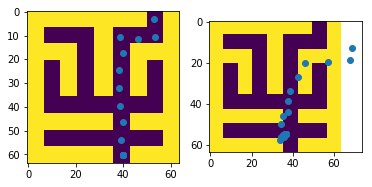

Train Epoch: 33 [79/80 (99%)] EnvLoss: 0.125238  RMSELoss: 5.637698 TotalLoss: 5.762935


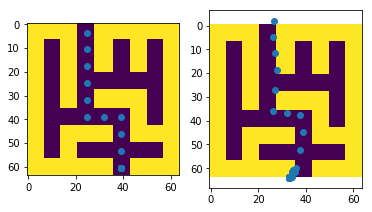

Train Epoch: 34 [79/80 (99%)] EnvLoss: 0.355798  RMSELoss: 6.083104 TotalLoss: 6.438901


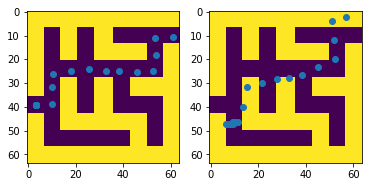

Train Epoch: 35 [79/80 (99%)] EnvLoss: 0.099050  RMSELoss: 6.309819 TotalLoss: 6.408868


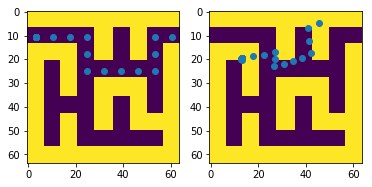

Train Epoch: 36 [79/80 (99%)] EnvLoss: 0.384193  RMSELoss: 6.033038 TotalLoss: 6.417232


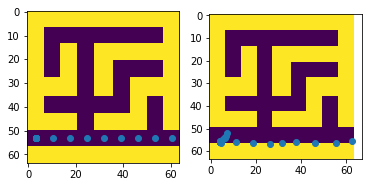

Train Epoch: 37 [79/80 (99%)] EnvLoss: 0.235899  RMSELoss: 5.613942 TotalLoss: 5.849841


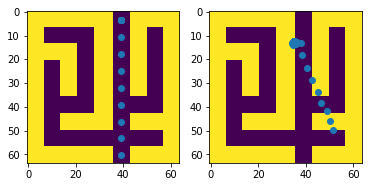

Train Epoch: 38 [79/80 (99%)] EnvLoss: 0.331696  RMSELoss: 5.966149 TotalLoss: 6.297845


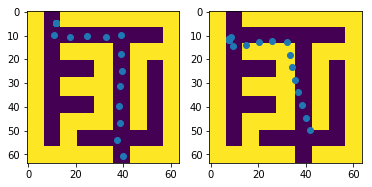

Train Epoch: 39 [79/80 (99%)] EnvLoss: 0.236475  RMSELoss: 5.976423 TotalLoss: 6.212898


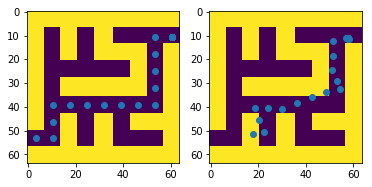

Train Epoch: 40 [79/80 (99%)] EnvLoss: 0.264803  RMSELoss: 6.350246 TotalLoss: 6.615052


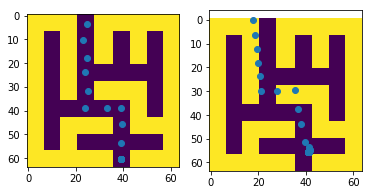

Train Epoch: 41 [79/80 (99%)] EnvLoss: 0.183888  RMSELoss: 6.078091 TotalLoss: 6.261979


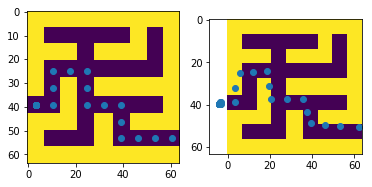

Train Epoch: 42 [79/80 (99%)] EnvLoss: 0.236017  RMSELoss: 5.256482 TotalLoss: 5.492499


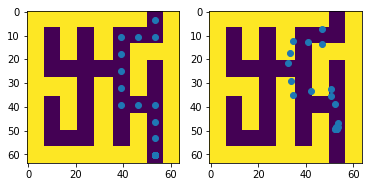

Train Epoch: 43 [79/80 (99%)] EnvLoss: 0.251805  RMSELoss: 6.118934 TotalLoss: 6.370738


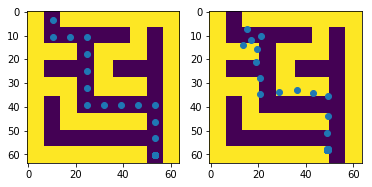

Train Epoch: 44 [79/80 (99%)] EnvLoss: 0.227255  RMSELoss: 5.070048 TotalLoss: 5.297302


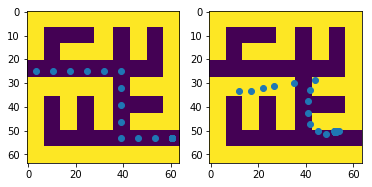

Train Epoch: 45 [79/80 (99%)] EnvLoss: 0.163917  RMSELoss: 5.411919 TotalLoss: 5.575836


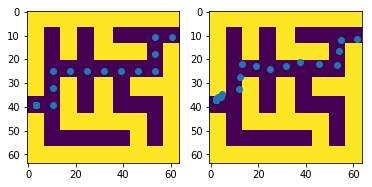

Train Epoch: 46 [79/80 (99%)] EnvLoss: 0.134880  RMSELoss: 5.581558 TotalLoss: 5.716437


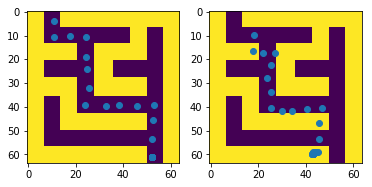

Train Epoch: 47 [79/80 (99%)] EnvLoss: 0.137791  RMSELoss: 5.503302 TotalLoss: 5.641093


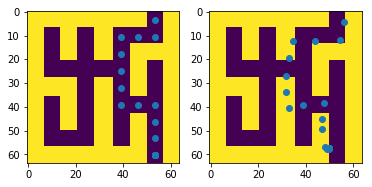

Train Epoch: 48 [79/80 (99%)] EnvLoss: 0.182357  RMSELoss: 5.798068 TotalLoss: 5.980425


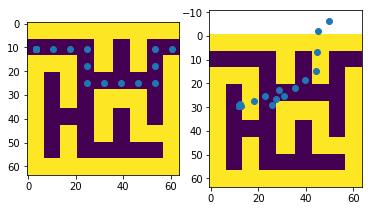

Train Epoch: 49 [79/80 (99%)] EnvLoss: 0.311182  RMSELoss: 5.627109 TotalLoss: 5.938293


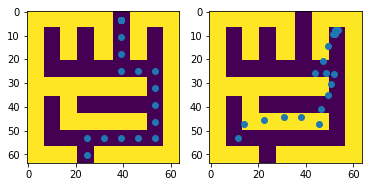

Train Epoch: 50 [79/80 (99%)] EnvLoss: 0.155385  RMSELoss: 5.521896 TotalLoss: 5.677282


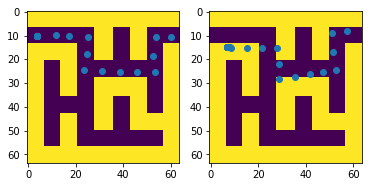

Train Epoch: 51 [79/80 (99%)] EnvLoss: 0.259760  RMSELoss: 5.051844 TotalLoss: 5.311602


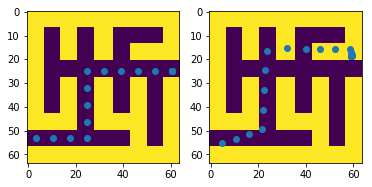

Train Epoch: 52 [79/80 (99%)] EnvLoss: 0.263793  RMSELoss: 5.867350 TotalLoss: 6.131142


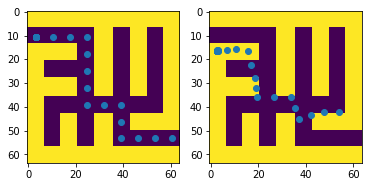

Train Epoch: 53 [79/80 (99%)] EnvLoss: 0.165160  RMSELoss: 4.922236 TotalLoss: 5.087396


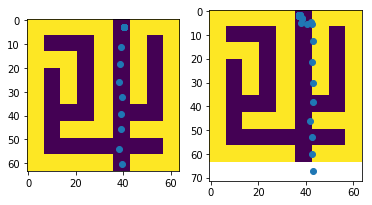

Train Epoch: 54 [79/80 (99%)] EnvLoss: 0.137106  RMSELoss: 5.252410 TotalLoss: 5.389515


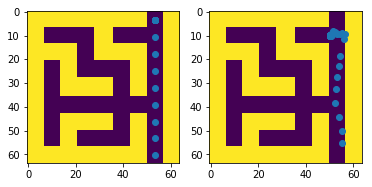

Train Epoch: 55 [79/80 (99%)] EnvLoss: 0.285914  RMSELoss: 5.194938 TotalLoss: 5.480853


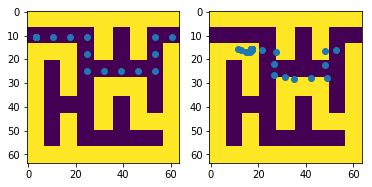

Train Epoch: 56 [79/80 (99%)] EnvLoss: 0.090135  RMSELoss: 5.875679 TotalLoss: 5.965814


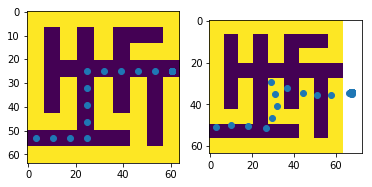

Train Epoch: 57 [79/80 (99%)] EnvLoss: 0.145557  RMSELoss: 4.865406 TotalLoss: 5.010964


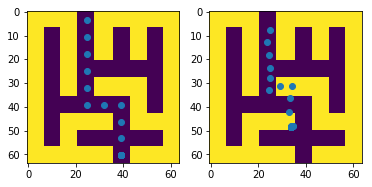

Train Epoch: 58 [79/80 (99%)] EnvLoss: 0.250426  RMSELoss: 5.337197 TotalLoss: 5.587624


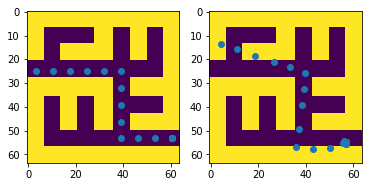

Train Epoch: 59 [79/80 (99%)] EnvLoss: 0.290932  RMSELoss: 5.079215 TotalLoss: 5.370147


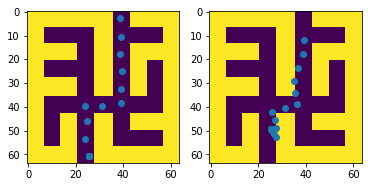

Train Epoch: 60 [79/80 (99%)] EnvLoss: 0.218532  RMSELoss: 5.202495 TotalLoss: 5.421027


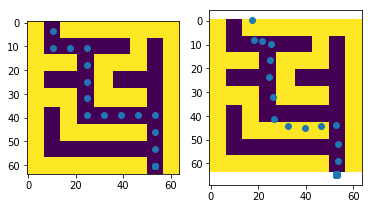

In [ ]:
net.train()
print('Init training loop...')

for epoch in range(1, epochs+1):
    iters = 0.0
    total_env = 0.0
    total_rmse = 0.0

    for batch_idx, (data, target, path, goals, expert_flag) in enumerate(trainloader):
        # Convert X, Y to Torch variables
        grid = data   # save numpy version of maze grid

        # Convert input and target to tensors
        data, target = Variable(data), Variable(target)
        data, target = data.to(device).float(), target.to(device).float()
 
        # Set gradient to zero
        optimizer.zero_grad()

        # Get network output
        output = net(data)

        # RMSE loss
        rmse_loss = rmse(output, target)
        r_loss = road_loss(torch.tensor(grid).reshape(64,64), output.reshape(-1,2).int())

        # Environmental Loss
        grid = grid[0][0].detach().numpy()
        path = path[0].detach().numpy()
        goals = goals[0].detach().numpy()
        output = output[0].detach().cpu().numpy()

        # Reconstruct predicted grids
        pred_grid = torch.tensor(draw_solution_canvas(grid, output)).double().to(device)
        #pred_path = torch.tensor(draw_solution_canvas(path, output)).double().to(device)
        #pred_goals = torch.tensor(draw_goals_canvas(grid, output)).double().to(device)

        # Compute graphic losses
        # Wall loss
        wall_loss = graphic_loss(torch.tensor(grid).to(device), pred_grid)
        # Path planning loss 
        #path_loss = graphic_loss(torch.tensor(path).to(device), pred_path)
        #path_loss = abs(wall_loss-path_loss)
        # Goals loss
        #goal_loss = graphic_loss(torch.tensor(goals).to(device), pred_goals)
        # Non-expert trajectory loss
        #env_loss = Variable((wall_loss + path_loss), requires_grad=True)/20 #
        
        # Final loss
        loss = rmse_loss + r_loss*5 #+ Variable(wall_loss) #env_loss
        
        env_loss = r_loss*5 #Variable(wall_loss)
    
        # Backpropagate loss & udpate gradient
        loss.backward()
        optimizer.step()

        # Print information
        iters += loss
        total_env += env_loss
        total_rmse+= rmse_loss

        print('Train Epoch: {} [{}/{} ({:.0f}%)] EnvLoss: {:.6f}  RMSELoss: {:.6f} TotalLoss: {:.6f}'.format(
                    epoch, batch_idx, len(trainloader.dataset),
                    100. * (batch_idx) / len(trainloader), 
                    total_env/len(trainloader), 
                    total_rmse/len(trainloader),
                    iters/len(trainloader)
                    ), 
                    end='\r', flush=True)
    print("")                                 
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(grid)
    ax[0].scatter(target[0][:,1], target[0][:,0])

    ax[1].imshow(grid)   
    ax[1].scatter(output[:,1], output[:,0])

    plt.show()


In [ ]:
#output
#plt.imshow(data.reshape(64,64))

In [ ]:
#output.reshape(-1,2)

In [ ]:

for i, (data, target, path, goals, expert_flag) in enumerate(testloader):
    # Convert input and target to tensors
    data, target = Variable(data), Variable(target)
    data, target = data.to(device).float(), target.to(device).float()
    # Get network output
    output = net(data)

    # RMSE loss
    rmse_loss = rmse(output, target)
    print(rmse_loss)
    
    #print(i)
    if i == 19:
        break


In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())